In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

# Observation
This dataset contains 891 rows and 12 columns

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Observation
This dataset contains 891 rows and 12 columns

We have float data in age and fare,object data in name , sex,ticket,cabin, embarked and integer data in passenger id,survived,pclass,sibsp,parch.

Survived column is our label rest all are features and label is categorical so it is our classification problem

we can see there r nulls in age,cabin and embarked column.we will use imputation tech for that.

i can see that passengerid and name r nominal data and they will not affect chance of survival ,so we can drop them

In [7]:
df['PassengerId'].nunique()

891

In [8]:
df['Name'].nunique()

891

# Observation
now it is evident that passengerid and name column have all unique values and they will not affect our target variable,so let's drop them

In [9]:
df=df.drop(columns=['PassengerId','Name'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#let's drop duplicates if any
df.drop_duplicates(inplace=True)
df.shape

(876, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    object 
 3   Age       711 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Ticket    876 non-null    object 
 7   Fare      876 non-null    float64
 8   Cabin     203 non-null    object 
 9   Embarked  874 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 75.3+ KB


In [13]:
df['Sex'].value_counts()

male      569
female    307
Name: Sex, dtype: int64

In [14]:
df['Ticket'].value_counts()

347082      7
3101295     6
347088      6
CA 2144     6
382652      5
           ..
2693        1
PC 17612    1
349233      1
349236      1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [15]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
F2             3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [16]:
df['Embarked'].value_counts()

S    633
C    165
Q     76
Name: Embarked, dtype: int64

In [17]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,876.000000,876.000000,711.000000,876.000000,876.000000,876.000000
mean,0.383562,2.301370,29.744613,0.474886,0.372146,32.035354
std,0.486531,0.837983,14.514652,0.946843,0.801912,49.975363
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.427100
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.548950
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Observation
age columns contains some null values 

survived is our label so we will not do any analysis on it

Pclass,Age,SibSp,Parch,Fare are our cont variables and they contain some skewness as well as outliers

We will perform graphical analysis for more details

# Let's do graphical analysis

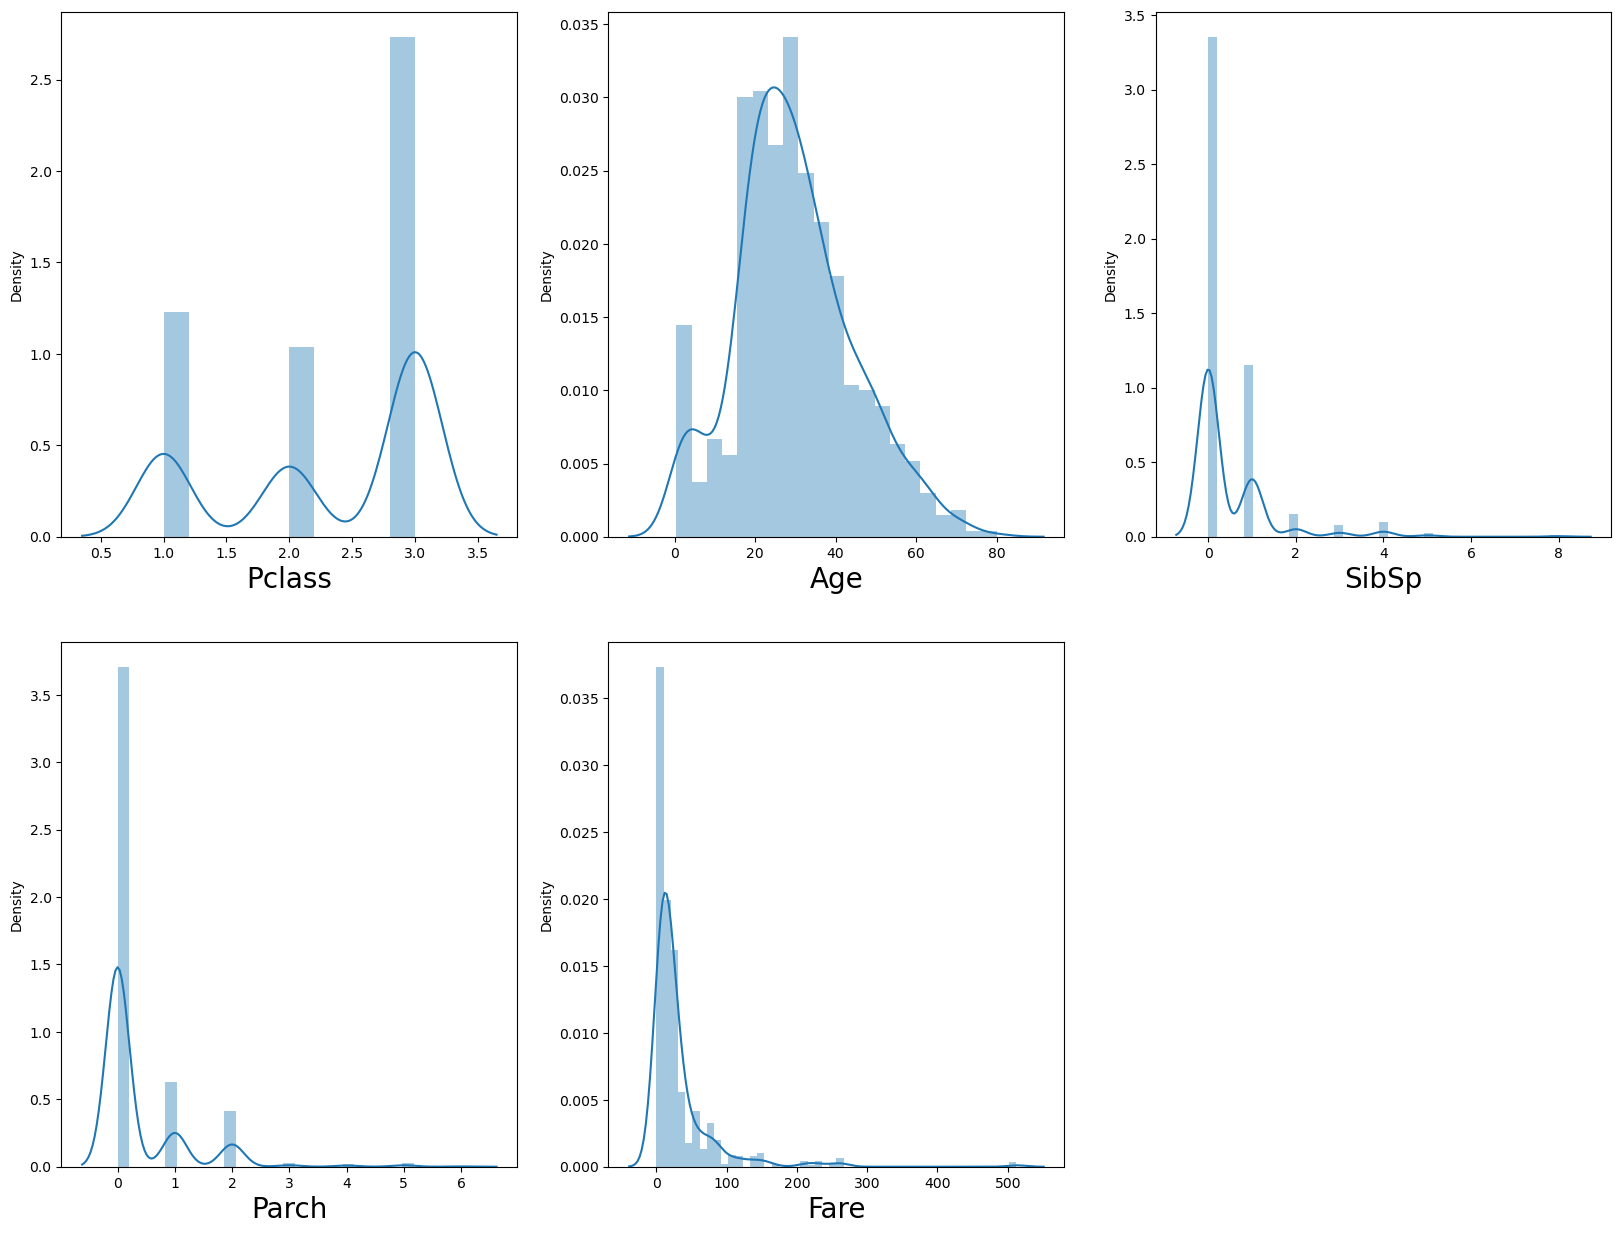

In [18]:
#lets build distplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['Pclass','Age','SibSp','Parch','Fare']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# Observation 
Data seems to be normally distributed but have ouliers,

Let's explore more

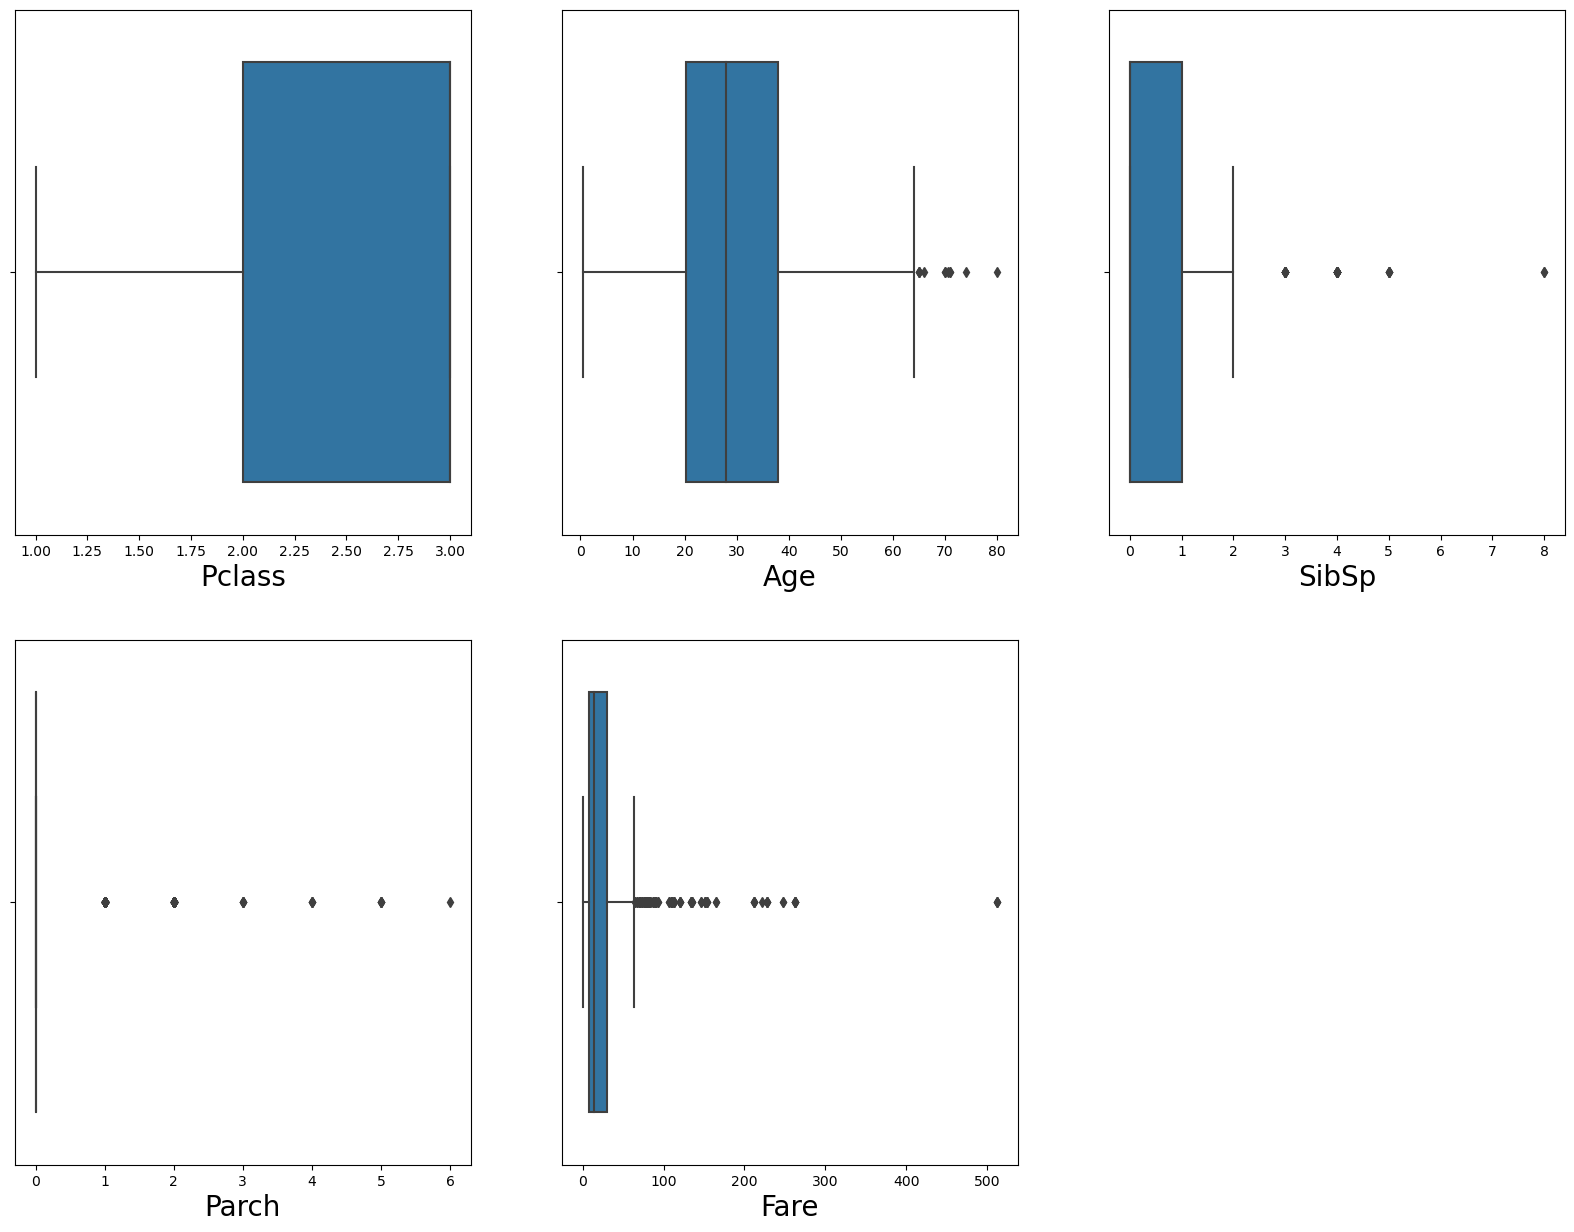

In [19]:
#lets build boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['Pclass','Age','SibSp','Parch','Fare']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# Observation
Except Pclass ,all columns have outliers in them

we wil deal with them ahead

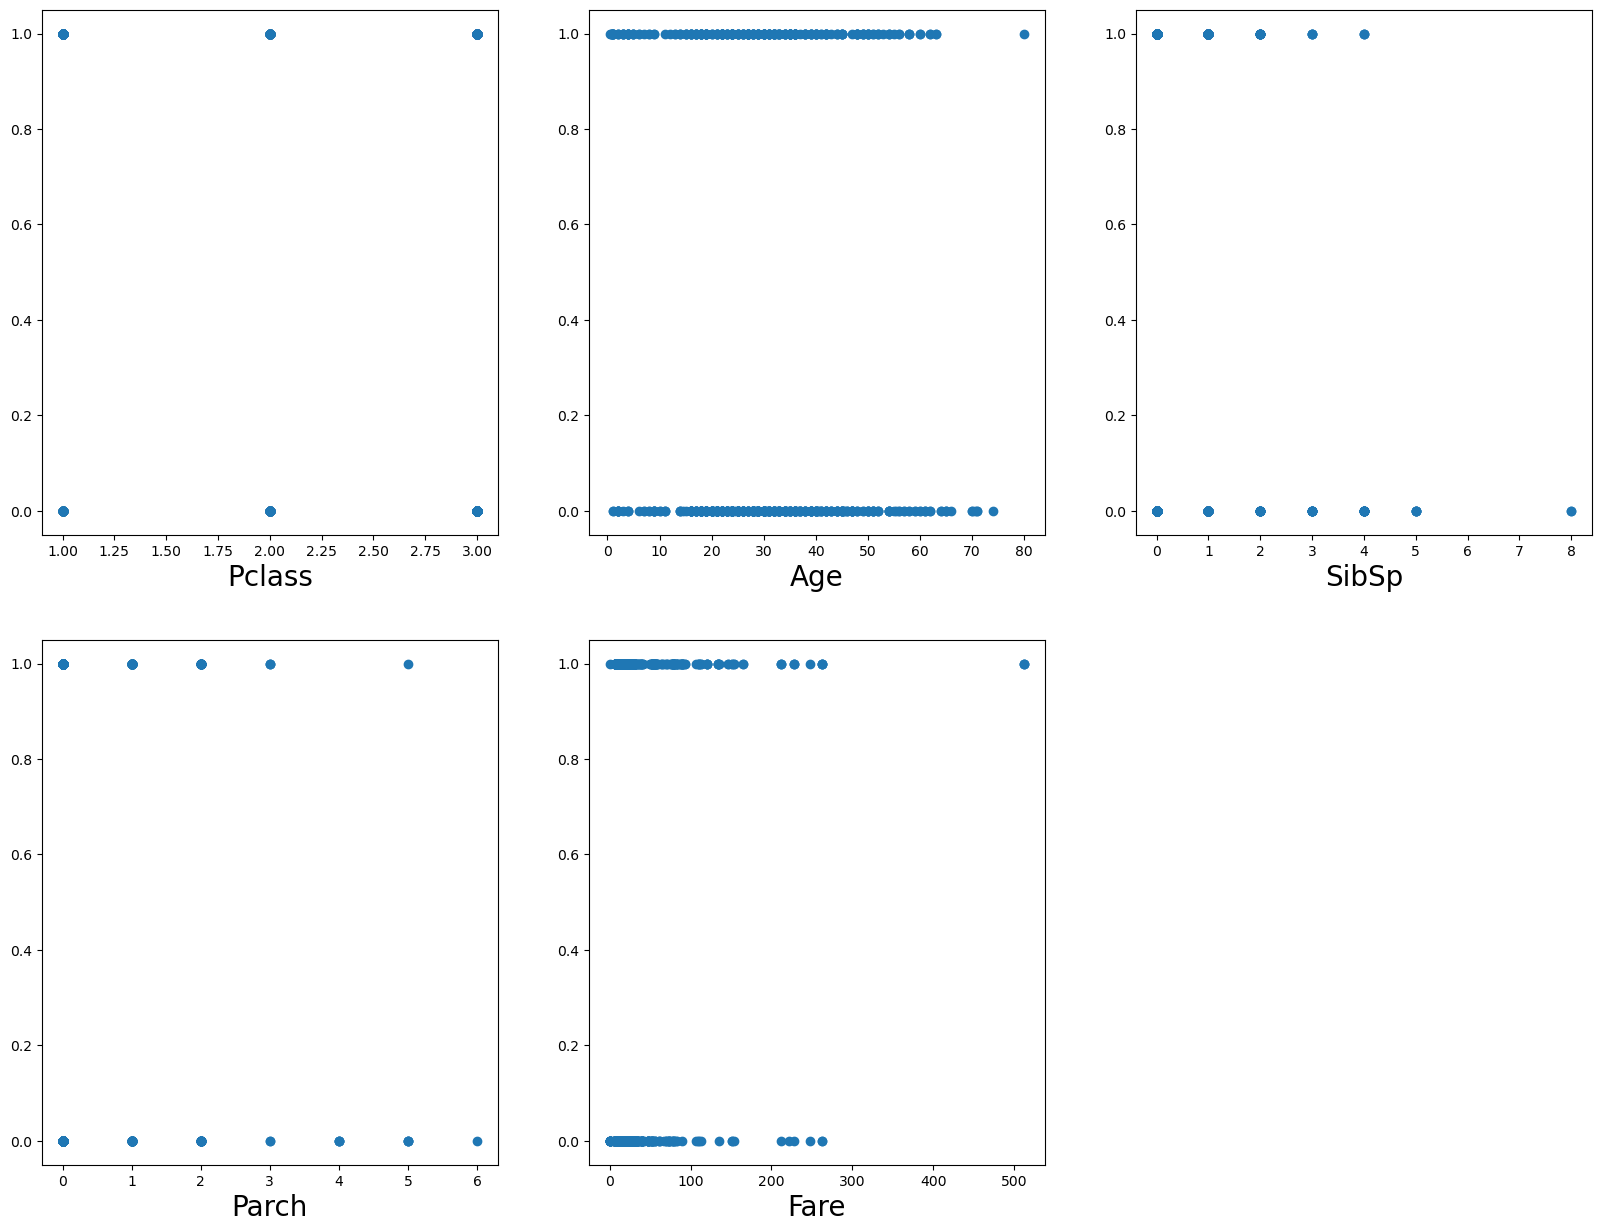

In [20]:
#lets build scatter plot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['Pclass','Age','SibSp','Parch','Fare']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(df[col],df['Survived'])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# Observation
all features have relation with our label column

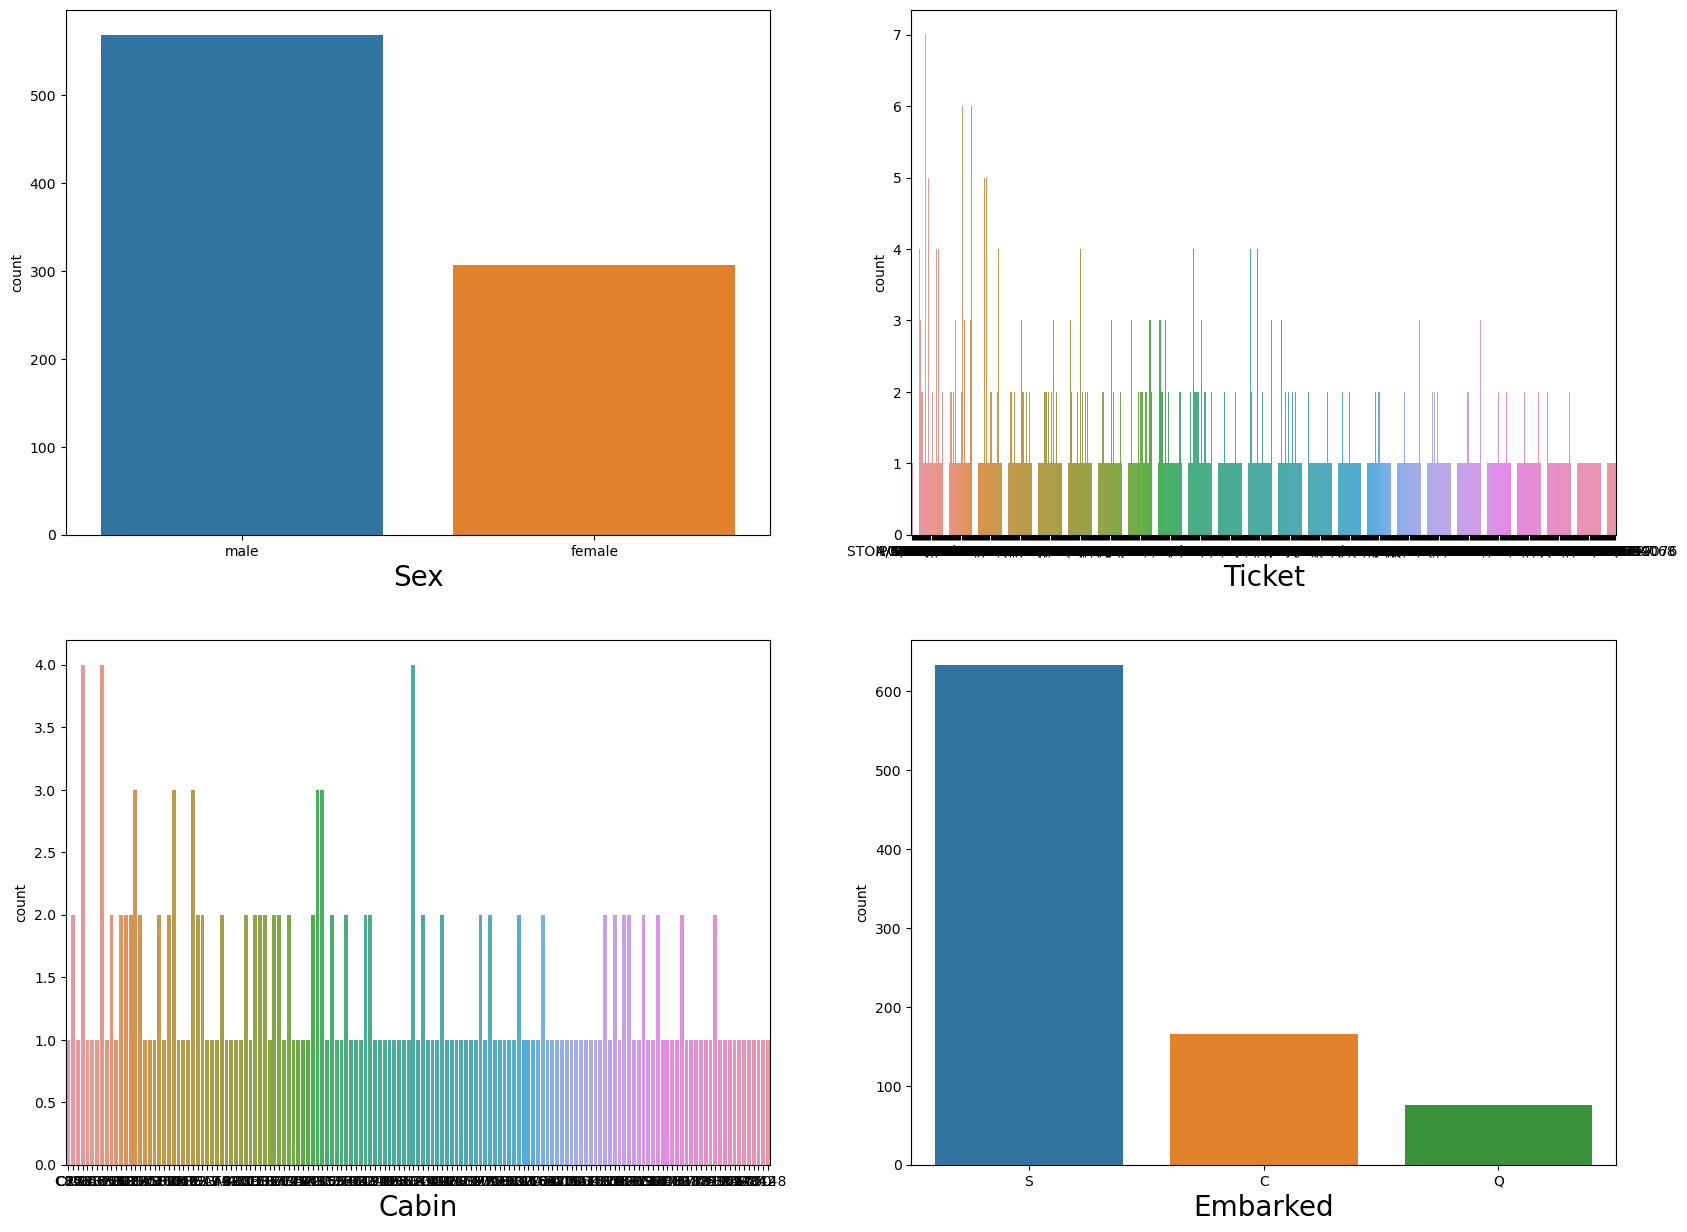

In [21]:
#lets build countplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['Sex','Ticket','Cabin','Embarked']]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

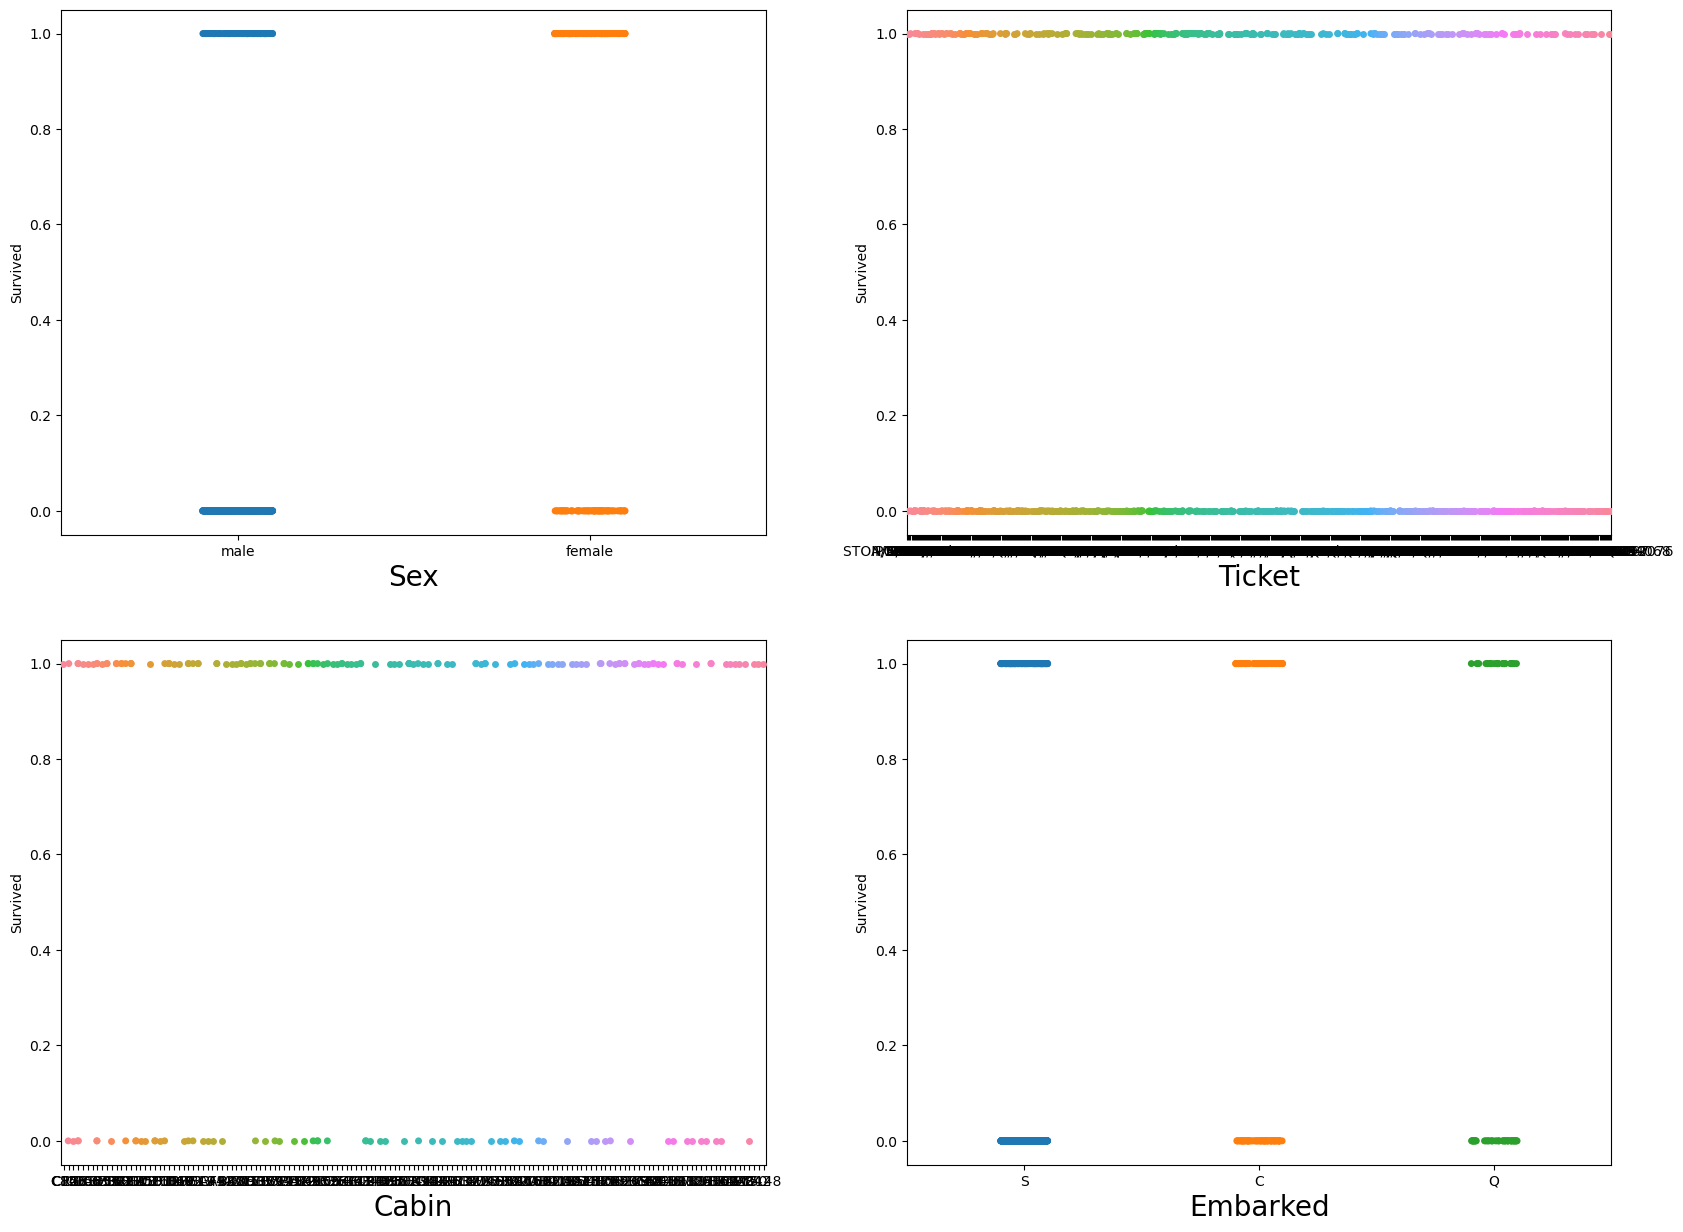

In [22]:
#lets build stripplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['Sex','Ticket','Cabin','Embarked']]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.stripplot(df[col],df['Survived'])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# Observation 
we can see that there is a relation between categorical columns and label column

# Now first let's fill nan

In [23]:
df['Age']=df['Age'].fillna(df['Age'].mean())


In [24]:
#let's again check data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    object 
 3   Age       876 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Ticket    876 non-null    object 
 7   Fare      876 non-null    float64
 8   Cabin     203 non-null    object 
 9   Embarked  874 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 75.3+ KB


In [25]:
#lets encode categorical features using label encoder
from sklearn.preprocessing import LabelEncoder 

In [26]:
for col in df.columns:
    if df[col].dtype == object:
        label = LabelEncoder()
        df[col] = label.fit_transform(df[col])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    int32  
 3   Age       876 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Ticket    876 non-null    int32  
 7   Fare      876 non-null    float64
 8   Cabin     876 non-null    int32  
 9   Embarked  876 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 61.6 KB


# now our dataset have no nan,lets check for skewness


In [28]:
df.skew()

Survived    0.479743
Pclass     -0.614150
Sex        -0.627944
Age         0.436683
SibSp       3.225973
Parch       2.826925
Ticket      0.006597
Fare        4.795386
Cabin      -2.152271
Embarked   -1.246502
dtype: float64

# our data have some skewness,lets use different methods to remove skewness

In [29]:
#before that lets impote 0's
df['SibSp']=df['SibSp'].replace(0,df['SibSp'].mean())
df['Parch']=df['Parch'].replace(0,df['Parch'].mean())
df['Fare']=df['Fare'].replace(0,df['Fare'].mean())


#lets use log transformation method
df['Pclass']=np.log(df['Pclass'])
df['Age']=np.log(df['Age'])
df['SibSp']=np.log(df['SibSp'])
df['Parch']=np.log(df['Parch'])
df['Fare']=np.log(df['Fare'])



In [30]:
df.skew()

Survived    0.479743
Pclass     -0.831946
Sex        -0.627944
Age        -2.641920
SibSp       1.928182
Parch       1.755162
Ticket      0.006597
Fare        0.910348
Cabin      -2.152271
Embarked   -1.246502
dtype: float64

# Observation
skewness is reduced in fare,parch,sibsp column but at the same time it got increased in pclass,age column.

let's check another methods

In [31]:
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
#lets apply cuberoot method
df1['Pclass']=np.cbrt(df1['Pclass'])
df1['Age']=np.cbrt(df1['Age'])
df1['SibSp']=np.cbrt(df1['SibSp'])
df1['Parch']=np.cbrt(df1['Parch'])
df1['Fare']=np.cbrt(df1['Fare'])

In [33]:
df1.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.776838
Age           -1.135912
SibSp          1.033059
Parch          1.348334
Fare           1.230382
dtype: float64

# Observation
after checking both methods i can observe that log transformation method is working well 

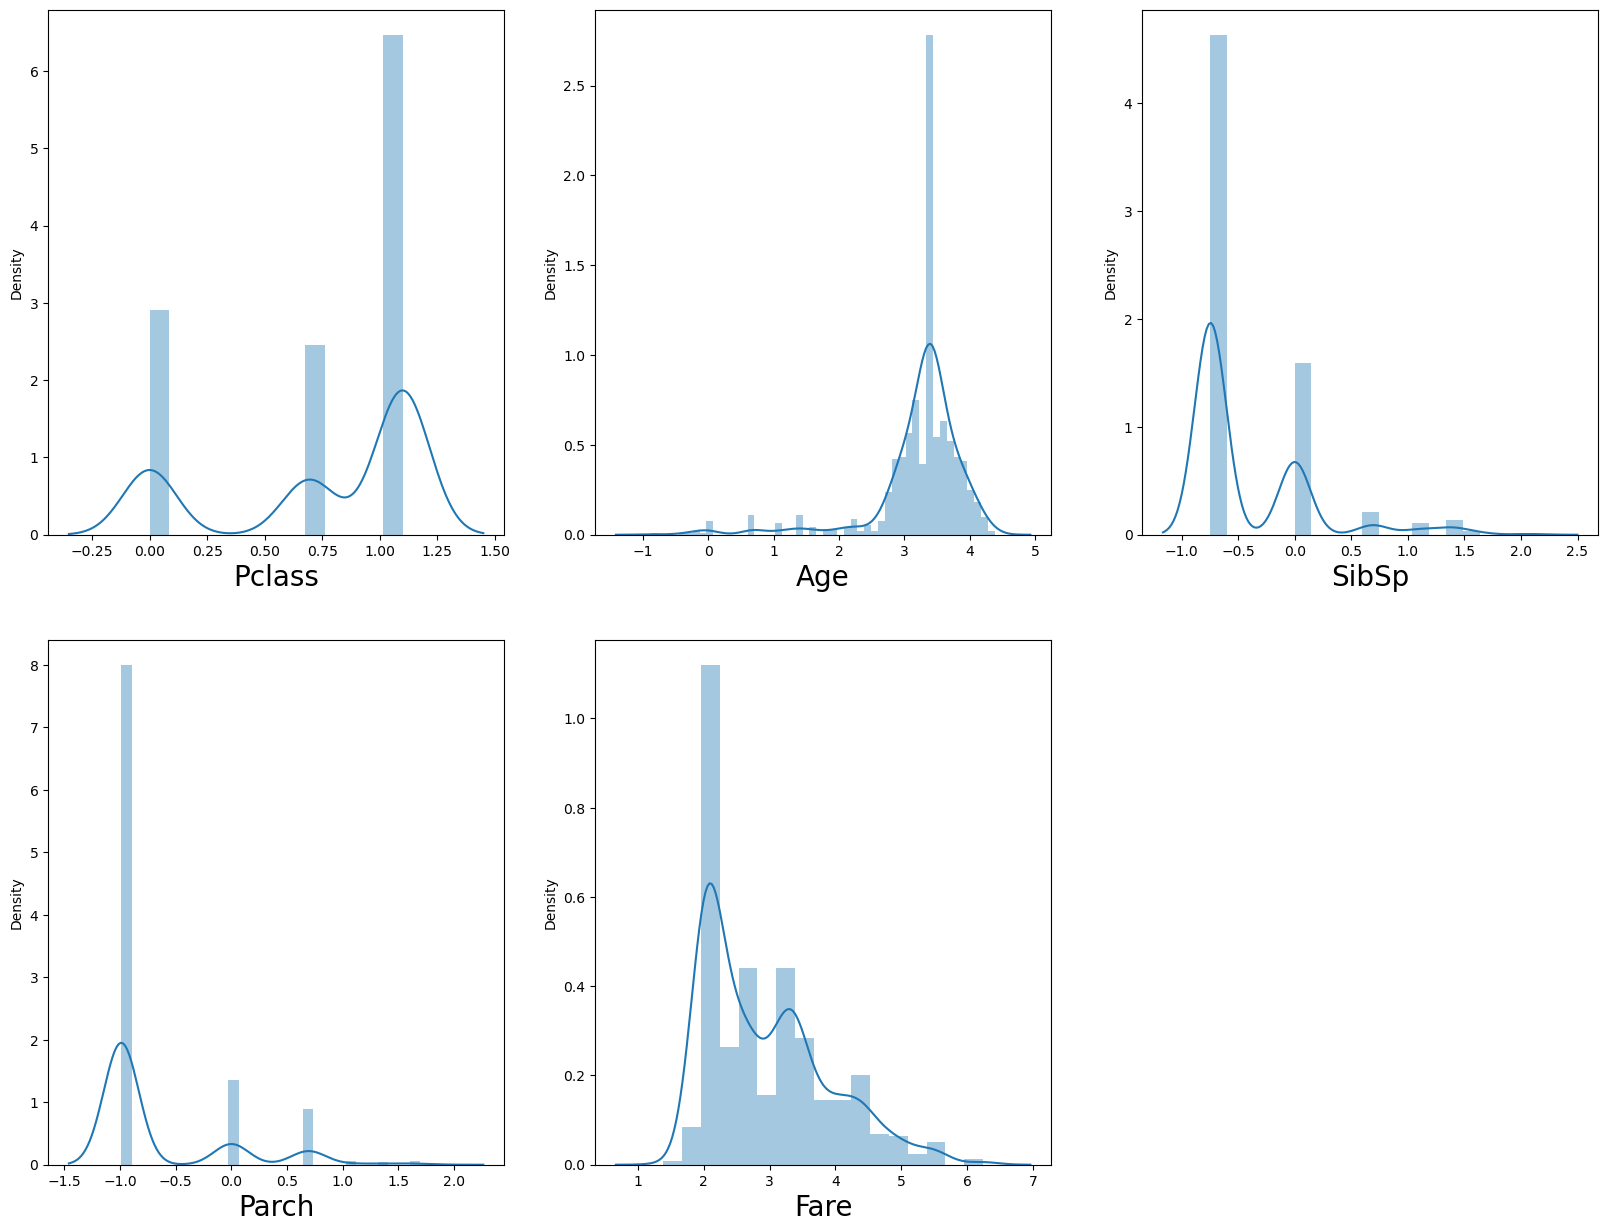

In [34]:
#lets build distplot after reducing skewness
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['Pclass','Age','SibSp','Parch','Fare']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# now  lets check for out liers using z score

In [35]:
from scipy.stats import zscore
col=df[['Age','SibSp','Parch','Fare']]
z_score=np.abs(zscore(col))
z_score

,Age,SibSp,Parch,Fare
0,0.207309,0.795395,0.515857,1.030357
1,0.571250,0.795395,0.515857,1.426456
2,0.030662,0.578044,0.515857,0.934670
3,0.454101,0.795395,0.515857,1.109920
4,0.454101,0.578044,0.515857,0.917848
...,...,...,...,...
886,0.084424,0.578044,0.515857,0.402682
887,0.416148,0.578044,0.515857,0.496185
888,0.222333,0.795395,2.252364,0.231413
889,0.030662,0.578044,0.515857,0.496185


In [36]:
np.where(z_score>3)

(array([  7,  13,  16,  16,  25,  43,  50,  59,  68,  71,  78, 119, 119,
        159, 164, 164, 167, 171, 172, 180, 182, 183, 193, 204, 232, 257,
        260, 260, 265, 277, 296, 304, 338, 346, 358, 372, 379, 384, 384,
        405, 434, 464, 474, 475, 524, 535, 536, 561, 604, 631, 634, 669,
        670, 674, 677, 726, 744, 776, 777, 791, 801, 812, 812, 815, 819,
        836, 870], dtype=int64),
 array([0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
        0, 0, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
        0, 1, 1, 2, 2, 2, 0, 2, 3, 1, 1, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        2], dtype=int64))

In [37]:
df1=df[(z_score<3).all(axis=1)]
df1.shape

(815, 10)

In [50]:
#let's check for dataloss
print('Data loss is :',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss is : 6.963470319634703


# Here data loss is in our acceptable range we can proceed ahead for model building

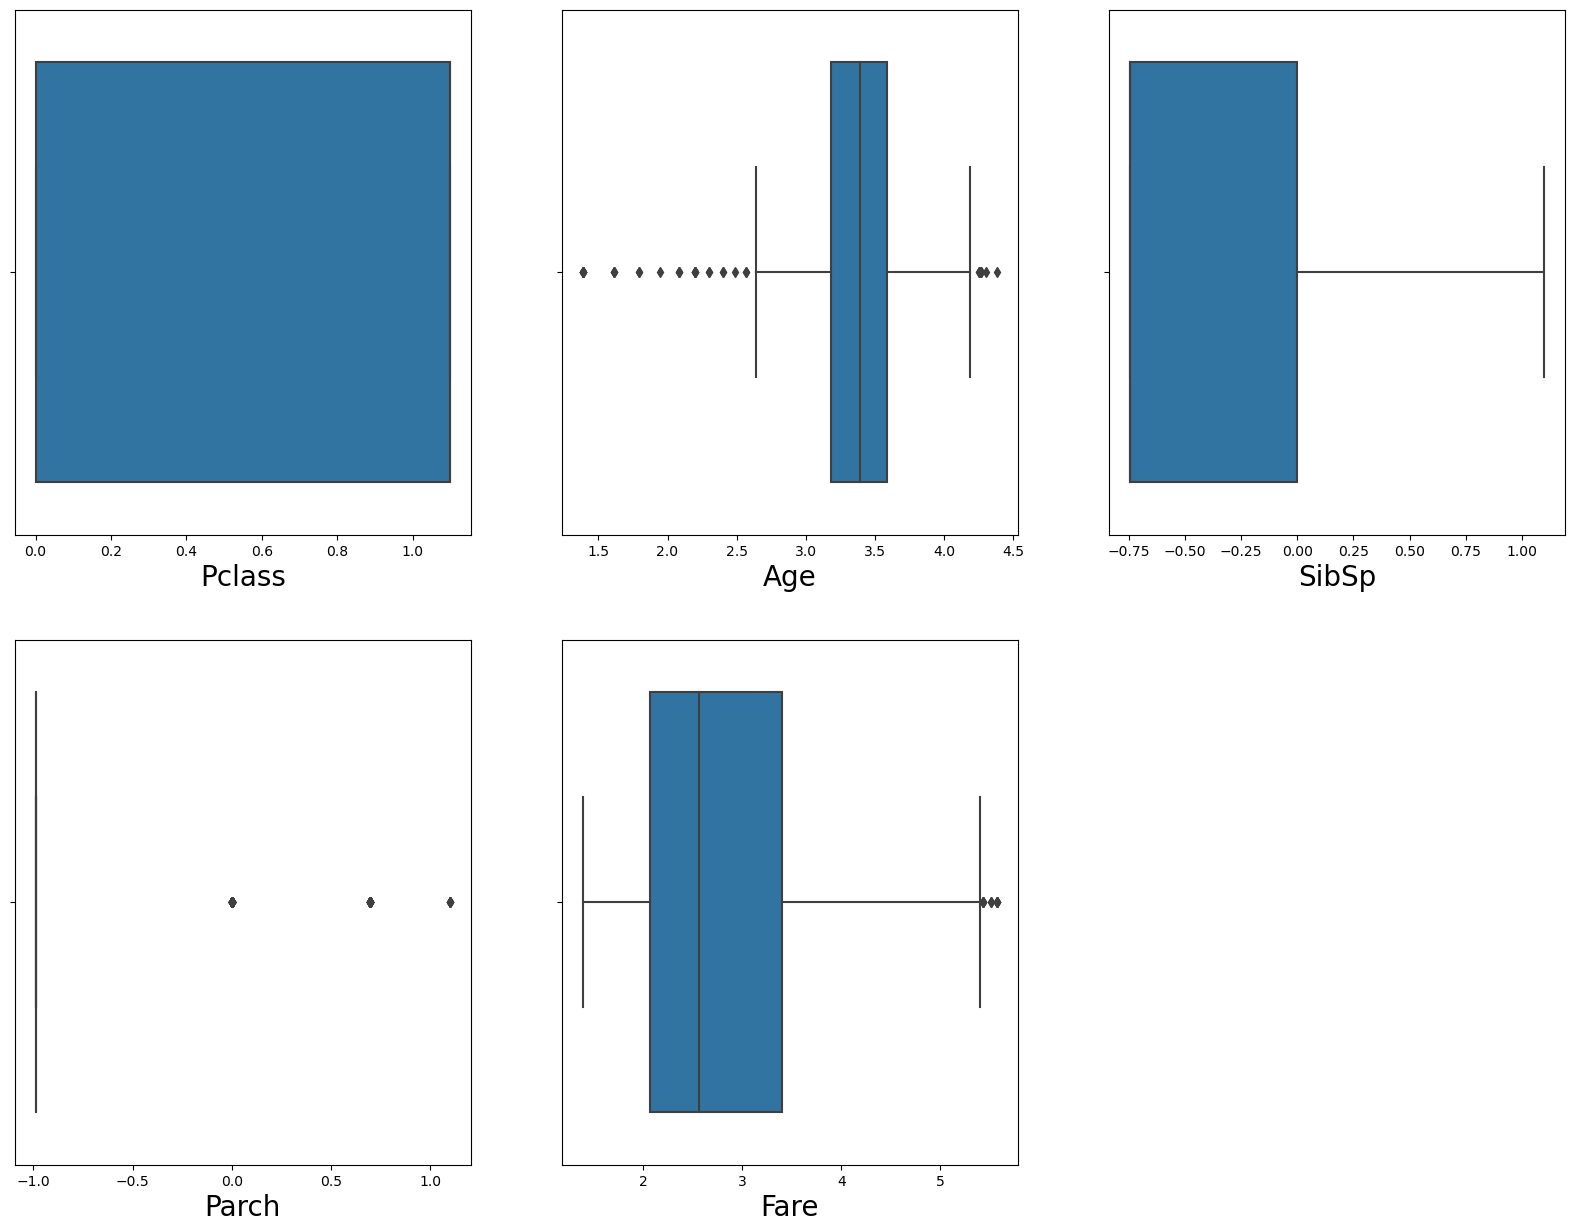

In [38]:
#lets build boxplot after removing outliers
plt.figure(figsize=(20,15))
plotnumber=1
for col in df1[['Pclass','Age','SibSp','Parch','Fare']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df1[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# Now let's check for corelation

In [39]:
corr=df1.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.336279,-0.599292,-0.089208,0.118447,0.186182,-0.158041,0.356107,-0.261605,-0.141681
Pclass,-0.336279,1.000000,0.151039,-0.280979,-0.106774,-0.108547,0.320952,-0.823950,0.715504,0.169999
Sex,-0.599292,0.151039,1.000000,0.123629,-0.203049,-0.274347,0.075015,-0.266198,0.113203,0.109606
Age,-0.089208,-0.280979,0.123629,1.000000,-0.129617,-0.238973,-0.077790,0.123694,-0.177057,-0.021631
SibSp,0.118447,-0.106774,-0.203049,-0.129617,1.000000,0.323614,-0.013704,0.370119,-0.066516,-0.025403
Parch,0.186182,-0.108547,-0.274347,-0.238973,0.323614,1.000000,-0.019820,0.346801,-0.116926,-0.023212
Ticket,-0.158041,0.320952,0.075015,-0.077790,-0.013704,-0.019820,1.000000,-0.205614,0.258403,0.007209
Fare,0.356107,-0.823950,-0.266198,0.123694,0.370119,0.346801,-0.205614,1.000000,-0.611341,-0.187885
Cabin,-0.261605,0.715504,0.113203,-0.177057,-0.066516,-0.116926,0.258403,-0.611341,1.000000,0.183042
Embarked,-0.141681,0.169999,0.109606,-0.021631,-0.025403,-0.023212,0.007209,-0.187885,0.183042,1.000000


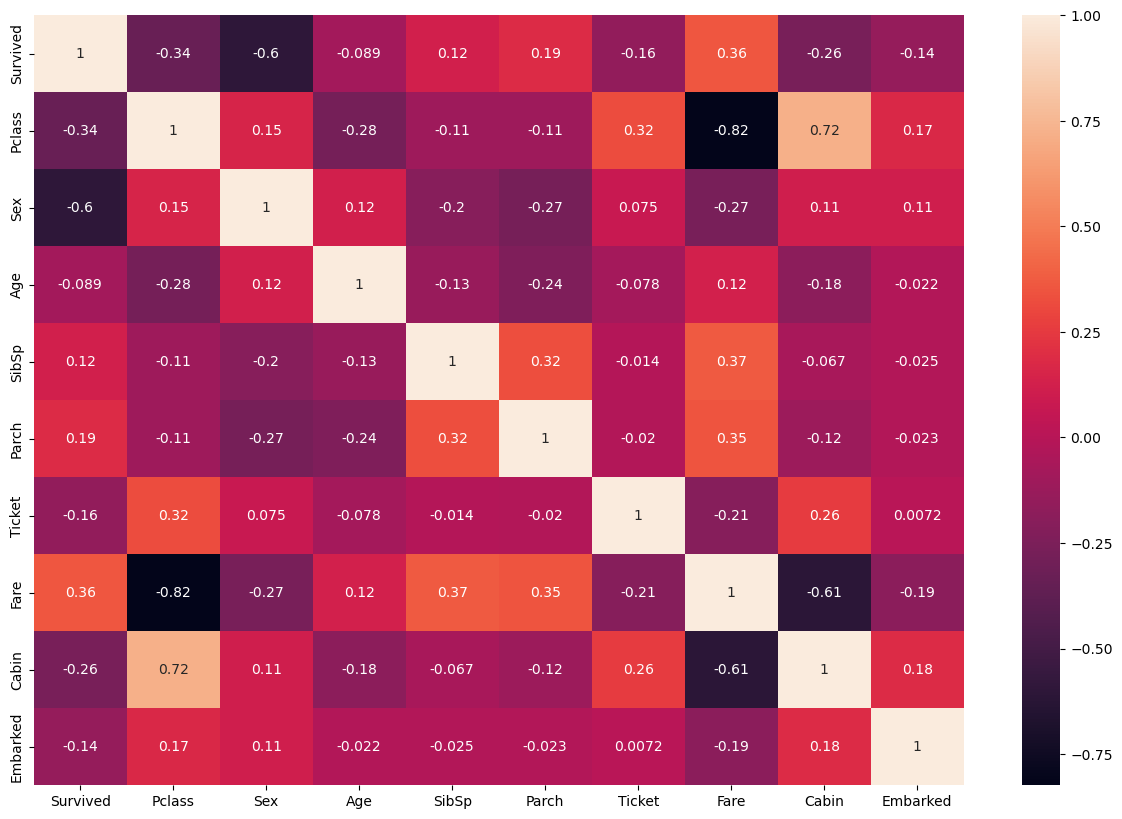

In [40]:
#lets plott heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

# Observation
1.from here we can visualize that Pclass,sex,age ,ticket,cabin,embarked have negative relation with our label.

2.fare,parch,sibsp have positive relation with our label.

3.fare and pclass,fare and cabin are strongly in negative corelation with each other.

4.fare and sibsp,fare and parch,parch and sibsp are in positive corelation.

5.cabin and pclass are strongly in positive corelation.

lets visualize using barplot

In [41]:
df1.drop('Survived',axis=1).corrwith(df1.Survived)

Pclass     -0.336279
Sex        -0.599292
Age        -0.089208
SibSp       0.118447
Parch       0.186182
Ticket     -0.158041
Fare        0.356107
Cabin      -0.261605
Embarked   -0.141681
dtype: float64

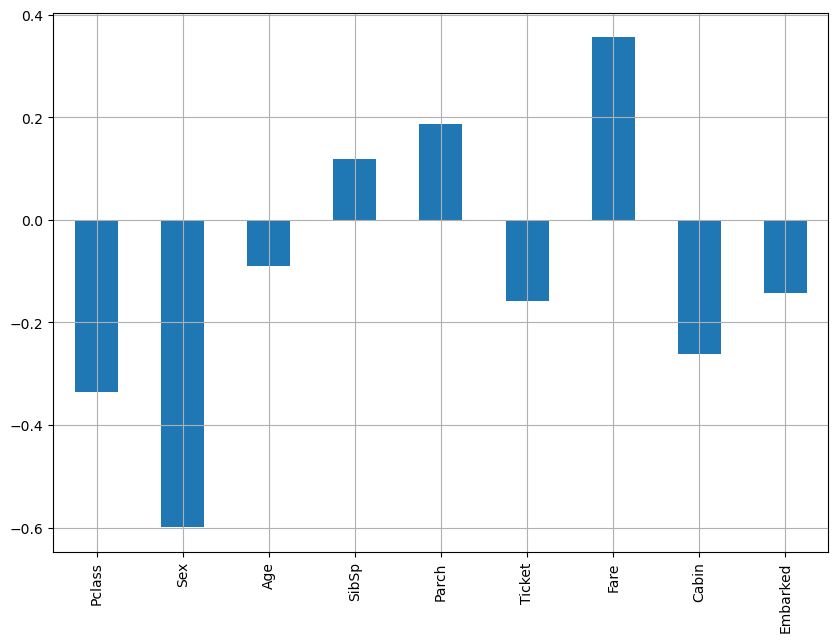

In [42]:
df1.drop('Survived',axis=1).corrwith(df1.Survived).plot(kind='bar',grid=True,figsize=(10,7))
plt.show()

# Observation
from here we can visualize the relation between label and target.

sex is strongly in negative corelation with our label whereas fare is positively corelated with our label

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
 #lets first standarize our data
from sklearn.preprocessing import StandardScaler
#first lets separate features and labels
X=df1.drop(columns=['Survived'])
y=df1['Survived']
#now lets standarize our data
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.802858,0.725408,-0.601961,1.190300,-0.443765,0.917774,-0.992380,0.464871,0.587754
1,-1.598526,-1.378534,0.658463,1.190300,-0.443765,1.277179,1.495571,-1.341227,-1.913653
2,0.802858,-1.378534,-0.216706,-0.568704,-0.443765,1.636584,-0.895481,0.464871,0.587754
3,-1.598526,-1.378534,0.468808,1.190300,-0.443765,-1.415897,1.175022,-2.052720,0.587754
4,0.802858,0.725408,0.468808,-0.568704,-0.443765,0.666683,-0.878446,0.464871,0.587754
...,...,...,...,...,...,...,...,...,...
810,-0.083421,0.725408,-0.129670,-0.568704,-0.443765,-1.159882,-0.356750,0.464871,0.587754
811,-1.598526,-1.378534,-0.940054,-0.568704,-0.443765,-1.588214,0.553509,-2.736848,0.587754
812,0.802858,-1.378534,0.093594,1.190300,2.858524,1.666124,0.285381,0.464871,0.587754
813,-1.598526,0.725408,-0.216706,-0.568704,-0.443765,-1.617754,0.553509,-1.915894,-1.913653


In [45]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=X.columns
#let's check for value
vif

,vif,features
0,5.273173,Pclass
1,1.150279,Sex
2,1.203731,Age
3,1.382969,SibSp
4,1.390532,Parch
5,1.140427,Ticket
6,4.989742,Fare
7,2.086075,Cabin
8,1.056903,Embarked


# Observation
Here i m taking vif value as 5 and it seems that there is no multicollinearity problem

# lets use selectkbest feature selection technique

In [46]:
from sklearn.feature_selection import SelectKBest,f_classif

In [47]:
best=SelectKBest(score_func=f_classif,k=8)
fit=best.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature=pd.concat([df_columns,df_scores],axis=1)
feature.columns=['feat_name','Score']
print(feature.nlargest(8,'Score'))

  feat_name       Score
1       Sex  455.630401
6      Fare  118.071012
0    Pclass  103.659207
7     Cabin   59.727144
4     Parch   29.193725
5    Ticket   20.826451
8  Embarked   16.654127
3     SibSp   11.568445


# here i m keeping all features as dataset is small and after checking kbest technique

# Modelling

In [48]:
#creating training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=76)

In [49]:
y.value_counts()

0    504
1    311
Name: Survived, dtype: int64

# Observation
Classes raito is 62:38,so im considering it as balanced dataset.

In [52]:
X.shape

(815, 9)

In [54]:
#import lib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [55]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("=======Train Result======")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n===Test Result====")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

In [56]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [57]:
metric_score(log,x_train,x_test,y_train,y_test,train=True)
metric_score(log,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:82.49%

===Test Result====
Accuracy Score:78.43%


Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       131
           1       0.68      0.75      0.71        73

    accuracy                           0.78       204
   macro avg       0.77      0.78      0.77       204
weighted avg       0.79      0.78      0.79       204



In [58]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [59]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:86.09%

===Test Result====
Accuracy Score:76.96%


Test Classification Report
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       131
           1       0.66      0.74      0.70        73

    accuracy                           0.77       204
   macro avg       0.75      0.76      0.76       204
weighted avg       0.78      0.77      0.77       204



In [60]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
metric_score(tree,x_train,x_test,y_train,y_test,train=True)
metric_score(tree,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:99.84%

===Test Result====
Accuracy Score:78.92%


Test Classification Report
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       131
           1       0.68      0.78      0.73        73

    accuracy                           0.79       204
   macro avg       0.77      0.79      0.78       204
weighted avg       0.80      0.79      0.79       204



In [62]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [63]:
metric_score(bag,x_train,x_test,y_train,y_test,train=True)
metric_score(bag,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:98.20%

===Test Result====
Accuracy Score:79.41%


Test Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       131
           1       0.72      0.68      0.70        73

    accuracy                           0.79       204
   macro avg       0.78      0.77      0.77       204
weighted avg       0.79      0.79      0.79       204



In [64]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
metric_score(rand,x_train,x_test,y_train,y_test,train=True)
metric_score(rand,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:99.84%

===Test Result====
Accuracy Score:79.90%


Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       131
           1       0.71      0.74      0.72        73

    accuracy                           0.80       204
   macro avg       0.78      0.79      0.78       204
weighted avg       0.80      0.80      0.80       204



In [66]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [67]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:88.05%

===Test Result====
Accuracy Score:77.94%


Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       131
           1       0.67      0.77      0.71        73

    accuracy                           0.78       204
   macro avg       0.76      0.78      0.77       204
weighted avg       0.79      0.78      0.78       204



In [68]:
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [69]:
metric_score(grad,x_train,x_test,y_train,y_test,train=True)
metric_score(grad,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:93.94%

===Test Result====
Accuracy Score:80.88%


Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       131
           1       0.72      0.75      0.74        73

    accuracy                           0.81       204
   macro avg       0.79      0.80      0.79       204
weighted avg       0.81      0.81      0.81       204



In [70]:
support=SVC()
support.fit(x_train,y_train)

SVC()

In [71]:
metric_score(support,x_train,x_test,y_train,y_test,train=True)
metric_score(support,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:84.62%

===Test Result====
Accuracy Score:80.39%


Test Classification Report
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       131
           1       0.70      0.79      0.74        73

    accuracy                           0.80       204
   macro avg       0.79      0.80      0.79       204
weighted avg       0.81      0.80      0.81       204



In [72]:
model=xgb.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
metric_score(model,x_train,x_test,y_train,y_test,train=True)
metric_score(model,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:99.84%

===Test Result====
Accuracy Score:80.88%


Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       131
           1       0.72      0.75      0.74        73

    accuracy                           0.81       204
   macro avg       0.79      0.80      0.79       204
weighted avg       0.81      0.81      0.81       204



# Observation
We can observe here that gradient boosting classifier and xgclassifier are giving same test result but differ in train result

let's check cross validation score more clearance

# cross val score


In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
#lets check for log model
pred=log.predict(x_test)
score=cross_val_score(log,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred)-score)

Difference is ; -0.021821243834957316


In [76]:
#now lets check for knn model
pred2=knn.predict(x_test)
score2=cross_val_score(knn,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred2)-score2)

Difference is ; -0.02057620594249976


In [77]:
#now lets check for decision tree model
pred3=tree.predict(x_test)
score3=cross_val_score(tree,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred3)-score3)

Difference is ; 0.010074581980031194


In [78]:
#now lets check for bagging model
pred4=bag.predict(x_test)
score4=cross_val_score(bag,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred4)-score4)

Difference is ; -0.02796824251172869


In [79]:
#now lets check for random forest model
pred5=rand.predict(x_test)
score5=cross_val_score(rand,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred5)-score5)

Difference is ; -0.03656321424275233


In [80]:
#now lets check for ada boost model
pred6=ada.predict(x_test)
score6=cross_val_score(ada,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred6)-score6)

Difference is ; -0.04758210032479249


In [81]:
#now lets check for gradient boost model
pred7=grad.predict(x_test)
score7=cross_val_score(grad,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred7)-score7)

Difference is ; -0.0230783110790328


In [82]:
#now lets check for SVC model
pred8=support.predict(x_test)
score8=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred8)-score8)

Difference is ; -0.01939131480813172


In [83]:
#now lets check for xgb model
pred9=model.predict(x_test)
score9=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred9)-score9)

Difference is ; -0.014489354023818013


# Observation
from here we can observe that decision tree classifier is our best model .

now we will use grid search cv for hyper parameter tuning

# Grid search cv

In [84]:
from sklearn.model_selection import GridSearchCV

In [99]:
params={
       'criterion':['entropy','gini'],
       'max_depth':[8,9,10,14,15,18,21,20],
       'min_samples_split':[9,10,11,12,13],
       'min_samples_leaf':[4,5,6,7,8,9,10,11,12,13],
       } 
grd=GridSearchCV(tree,param_grid=params)
grd.fit(x_train,y_train)
print('Best_Parameters ',grd.best_params_)

Best_Parameters  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 9}


In [100]:
final_model1=grd.best_estimator_
final_model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=9)

In [101]:
metric_score(final_model1,x_train,x_test,y_train,y_test,train=True)
metric_score(final_model1,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:89.36%

===Test Result====
Accuracy Score:80.88%


Test Classification Report
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       131
           1       0.75      0.70      0.72        73

    accuracy                           0.81       204
   macro avg       0.79      0.78      0.79       204
weighted avg       0.81      0.81      0.81       204



# Observation
After using different entries in parameters while using grid searchcv,we found best parameters and our test score also increased

now lets check roc auc curve and auc score

In [102]:
from sklearn.metrics import roc_curve,roc_auc_score

In [103]:
fpr,tpr,thresholds=roc_curve(y_test,pred3)

In [104]:
print('threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False Positive Rate=',fpr)

threshold= [2 1 0]
True Positive Rate= [0.         0.78082192 1.        ]
False Positive Rate= [0.         0.20610687 1.        ]


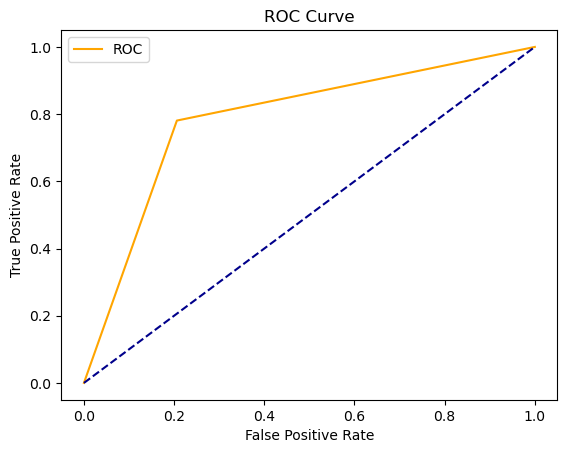

In [105]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
    

In [106]:
#Let's check auc score
auc_score=roc_auc_score(y_test,pred3)
print(auc_score*100)

78.73575237896058
